In [ ]:
#Uncomment one of these lines(according to your pip version) if you haven't installed otter before
# !pip install otter-grader 
# !pip3 install otter-grader

In [6]:
# Initialize Otter
import otter
grader = otter.Notebook()

# **Assignment 1 (Part 2)**

<h3>Assignment Instructions</h3>

* **How to install 'otter'**: Run `!pip install otter-grader`
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`
* For the questions asking for explanation, write your answers in the text box below the relevant question infront of "Answer:"


<h3>Submission Instructions</h3>

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not have any folder or any other file.
* The name of the zip file must be your `RollNumber_PA1`


Uncomment the line below if you have not installed otter-grader before

Please run the cell below to import all the necessary libraries that you would require for this part

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

<h3>Understanding your data<h3/>

**Question 1a:** Import the dataframe and save it in the variable `nba_data`. Then store the last 10 rows of the dataset in the variable `nba_data_last_10`. Lastly, visualize `nba_data_last_10`

       Unnamed: 0      player_name team_abbreviation   age  player_height  \
12834       12834     Jimmy Butler               MIA  33.0         200.66   
12835       12835     Jock Landale               PHX  27.0         210.82   
12836       12836       Joe Harris               BKN  31.0         198.12   
12837       12837       Joe Ingles               MIL  35.0         205.74   
12838       12838     Joe Wieskamp               TOR  23.0         198.12   
12839       12839      Joel Embiid               PHI  29.0         213.36   
12840       12840  John Butler Jr.               POR  20.0         213.36   
12841       12841     John Collins               ATL  25.0         205.74   
12842       12842     Jericho Sims               NYK  24.0         208.28   
12843       12843   JaMychal Green               GSW  33.0         205.74   

       player_weight        college    country draft_year draft_round  ...  \
12834     104.326160      Marquette        USA       2011           1  ...

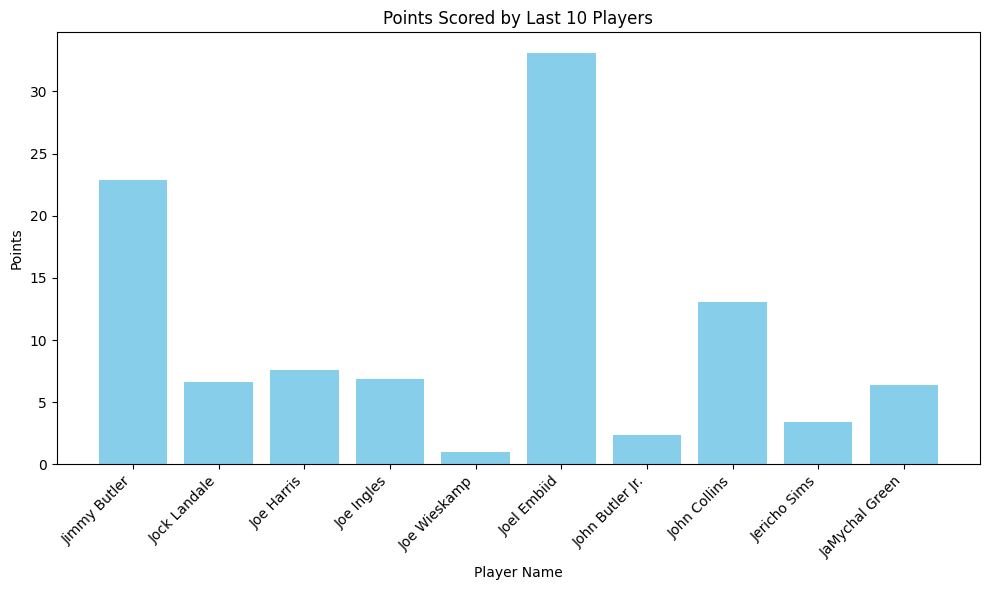

In [7]:
file_path = 'all_seasons.csv'
nba_data = pd.read_csv(file_path)
nba_data_last_10 = nba_data.tail(10)
print(nba_data_last_10)

plt.figure(figsize=(10, 6))
plt.bar(nba_data_last_10['player_name'], nba_data_last_10['pts'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Points Scored by Last 10 Players')
plt.xlabel('Player Name')
plt.ylabel('Points')
plt.tight_layout()
plt.show()

In [8]:
grader.check("q1a")

q1a results: All test cases passed!

**Question 1b:** Using the provided mapping `column_mapping`, rename the columns with undescriptive titles to more descriptive titles in camel case format. Implement the mapping and rename the columns in the DataFrame.

In [9]:
# Mapping of original column names to descriptive camel case titles
column_mapping = {
    'player_name': 'playerName',
    'team_abbreviation': 'teamAbbreviation',
    'age': 'age',
    'player_height': 'playerHeight',
    'player_weight': 'playerWeight',
    'college': 'college',
    'country': 'country',
    'draft_year': 'draftYear',
    'draft_round': 'draftRound',
    'draft_number': 'draftNumber',
    'gp': 'gamesPlayed',
    'pts': 'points',
    'reb': 'rebounds',
    'ast': 'assists',
    'net_rating': 'netRating',
    'oreb_pct': 'offensiveReboundPercentage',
    'dreb_pct': 'defensiveReboundPercentage',
    'usg_pct': 'usagePercentage',
    'ts_pct': 'trueShootingPercentage',
    'ast_pct': 'assistPercentage',
    'season': 'season'
}
nba_data = nba_data.rename(columns=column_mapping)

In [10]:
grader.check("q1b")

q1b results: All test cases passed!

**Question 1c:** Store the concise summary of the DataFrame in the variable `nba_data_summary` which includes the number of rows and columns, the data types of each column, the number of non-null values in each column and the memory usage of the DataFrame.

In [11]:
num_rows, num_columns = nba_data.shape
data_types = nba_data.dtypes
non_null_counts = nba_data.count()
memory_usage = nba_data.memory_usage(deep=True).sum()

nba_data_summary = f"Number of rows: {num_rows}\n" \
                   f"Number of columns: {num_columns}\n\n" \
                   f"Data types:\n{data_types}\n\n" \
                   f"Non-null values:\n{non_null_counts}\n\n" \
                   f"Memory usage: {memory_usage / 1024**2:.2f} MB"

print(nba_data_summary)

Number of rows: 12844
Number of columns: 22

Data types:
Unnamed: 0                      int64
playerName                     object
teamAbbreviation               object
age                           float64
playerHeight                  float64
playerWeight                  float64
college                        object
country                        object
draftYear                      object
draftRound                     object
draftNumber                    object
gamesPlayed                     int64
points                        float64
rebounds                      float64
assists                       float64
netRating                     float64
offensiveReboundPercentage    float64
defensiveReboundPercentage    float64
usagePercentage               float64
trueShootingPercentage        float64
assistPercentage              float64
season                         object
dtype: object

Non-null values:
Unnamed: 0                    12844
playerName                    12844
tea

**Question 2a:** Drop the column "Unnamed: 0". Explain why there is a need to do so?

In [12]:
nba_data = nba_data.drop(columns=['Unnamed: 0'])
#It is a duplicate of the Dataframe's inherent index. So it's redundant.

Answer:

In [13]:
grader.check("q2a")

q2a results: All test cases passed!

**Question 2b:** Your task is to perform missing values analysis. Make a table with 3 columns. 1st column has all the column names , 2nd column has total no. of missing values titled `Total No. of Missing Values`, 3rd column has percentage of Missing Values rounded to 2 decimal places titled `% of Missing Values`. Store the result in `missing_df`

In [14]:
missing_values = nba_data.isnull().sum()
missing_percentage = (missing_values / len(nba_data)) * 100
missing_percentage = missing_percentage.round(2)

missing_df = pd.DataFrame({
    'Total No. of Missing Values': missing_values,
    '% of Missing Values': missing_percentage
})

In [15]:
grader.check("q2b")

q2b results: All test cases passed!

**Question 2c:** Store the names of numerical data columns and categorical data columns in the two arrays `numerical_data` and `categorical_data` respectively. Note: Use the `to_list()` function to convert your answer to a list of values.

In [16]:
numerical_data = nba_data.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_data = nba_data.select_dtypes(include=['object', 'category']).columns.to_list()

In [17]:
grader.check("q2c")

q2c results: All test cases passed!

**Question 2d:** Handle null values appropriately. If categorical, fill with "DNE". If numerical fill with mean.

In [18]:
for column in numerical_data:
    nba_data[column].fillna(nba_data[column].mean(), inplace=True)

for column in categorical_data:
    nba_data[column].fillna("DNE", inplace=True)

In [19]:
grader.check("q2d")

q2d results: All test cases passed!

<h3>Analysis<h3/>

**Question 3:** What are the summary statistics for key player performance metrics i.e points, rebounds, assists and age? Store your answer in `performance_summary`.

In [20]:
performance_metrics = ['points', 'rebounds', 'assists', 'age']
performance_summary = nba_data[performance_metrics].describe()

In [21]:
grader.check("q3")

q3 results: All test cases passed!

Q4. Which top 3 teams have the highest average points per player? Store your answer in the form of a list in `top_3_teams`. Note: Use the `to_list()` function to convert your answer to a list of values.

In [22]:
average_points_per_team = nba_data.groupby('teamAbbreviation')['points'].mean()
top_teams = average_points_per_team.sort_values(ascending=False)
top_3_teams = top_teams.head(3).index.to_list()

In [23]:
grader.check("q4")

q4 results: All test cases passed!

Q5. How many players have last names starting with 'Mc' or 'O’' (e.g., McCollum, O'Neal)? This question explores the frequency of players with common Irish or Scottish prefixes in their last names. Store your answer in `mc_o_names_count` Hint: Use Regex!

In [24]:
mc_o_names = nba_data[nba_data['playerName'].str.contains(r"\b(Mc|O')", regex=True)]
mc_o_names_count = mc_o_names.shape[0]

In [25]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6a:** Analyze how different teams perform across various statistics in the 2022-23 season. Create a pivot table that shows the **average** points (points), rebounds (rebounds), and assists (assists) for each team in the 2022-23 season. Store your answer in `avg_stats_pivot`

In [26]:
season_data = nba_data[nba_data['season'] == '2022-23']
avg_stats_pivot = season_data.pivot_table(
    index='teamAbbreviation',
    values=['points', 'rebounds', 'assists'],
    aggfunc='mean'
)


In [27]:
grader.check("q6a")

q6a results: All test cases passed!

**Question 6b:** Identify the team with the highest average points, rebounds, and assists from the pivot table. Store your answers in `highest_avg_points_team` , `highest_avg_rebounds_team` , `highest_avg_assists_team` respectively.

In [28]:
highest_avg_points_team = avg_stats_pivot['points'].idxmax()
highest_avg_rebounds_team = avg_stats_pivot['rebounds'].idxmax()
highest_avg_assists_team = avg_stats_pivot['assists'].idxmax()

In [29]:
grader.check("q6b")

q6b results: All test cases passed!

**Question 6c:** Create a pivot table that displays the count of players from each country for each team in the 2022-23 season. Store your answer in `players_count_pivot`.

In [30]:
nba_2022_23 = nba_data[nba_data['season'] == '2022-23']
players_count_pivot = nba_2022_23.pivot_table(index='teamAbbreviation', columns='country', aggfunc='size', fill_value=0)

In [31]:
grader.check("q6c")

q6c results: All test cases passed!

**Question 6d:** Identify the country with the most players for the team with the highest average assists. Store your answer in `country_most_players`.

In [32]:
highest_avg_assists_team = avg_stats_pivot['assists'].idxmax()
team_players = nba_data[nba_data['teamAbbreviation'] == highest_avg_assists_team]
country_counts = team_players['country'].value_counts()
country_most_players = country_counts.idxmax()

In [33]:
grader.check("q6d")

q6d results: All test cases passed!

<h3> Data Visualization <h3/>

**Question 7a:** Analyze the correlation between key performance metrics. Create a heatmap to visualize the correlation between the following statistics for players in the 2022-23 season:

- **Points** (`points`)
- **Rebounds** (`rebounds`)
- **Assists** (`assists`)
- **True Shooting Percentage** (`trueShootingPercentage`)
- **Usage Percentage** (`usagePercentage`)
- **Net Rating** (`netRating`)
- **Offensive Rebound Percentage** (`offensiveReboundPercentage`)
- **Defensive Rebound Percentage** (`defensiveReboundPercentage`)
- **Assist Percentage** (`assistPercentage`)

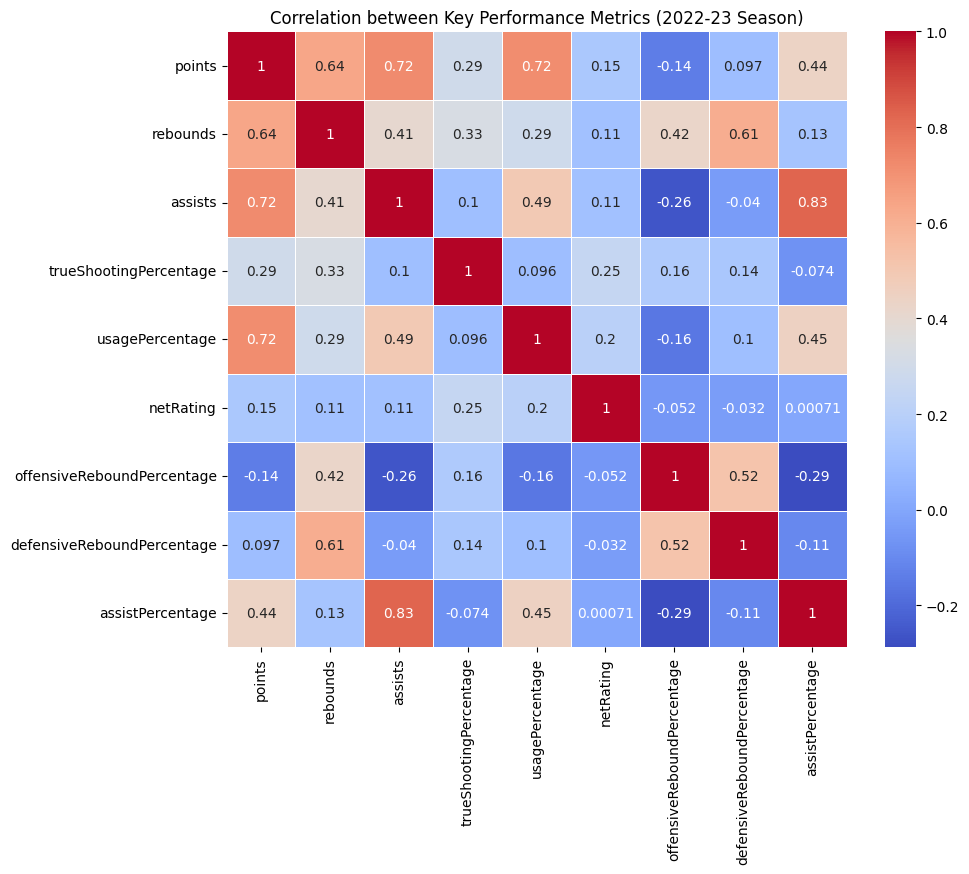

In [34]:
performance_metrics = nba_2022_23[['points', 'rebounds', 'assists', 'trueShootingPercentage', 'usagePercentage', 'netRating', 'offensiveReboundPercentage', 'defensiveReboundPercentage', 'assistPercentage']]
correlation_matrix = performance_metrics.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Key Performance Metrics (2022-23 Season)')
plt.show()

**Question 7b:** Store
1. the most strongly correlated pair of metrics in the form of a list in the variable `strongly_correlated_pair`
2. their correlation coefficient in variable `correlation_coefficient`

Interpret the correlation heatmap. What interesting insights can you draw?

In [50]:
strongly_correlated_pair = ['assists', 'assistPercentage']
correlation_coefficient = 0.83

Answer:

In [51]:
grader.check("q7b")

q7b results: All test cases passed!

**Question 8a:** Analyze the distribution of scoring performance for players on three specific teams in the 2022-23 season: Golden State Warriors (GSW), Boston Celtics (BOS), and Miami Heat (MIA). Create a single violin plot to visualize the distribution of points (points) scored by players from each of these teams.

This analysis facilitates a comparative understanding of how these three teams perform in terms of scoring.

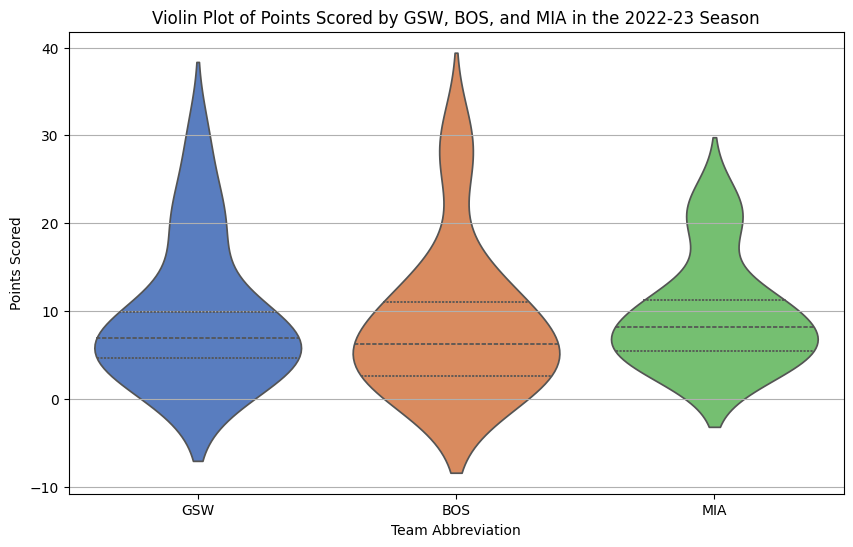

In [52]:
teams_of_interest = ['GSW', 'BOS', 'MIA']
filtered_data = nba_2022_23[(nba_2022_23['teamAbbreviation'].isin(teams_of_interest))]

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, x='teamAbbreviation', y='points', inner='quartile', palette='muted')
plt.title('Violin Plot of Points Scored by GSW, BOS, and MIA in the 2022-23 Season')
plt.xlabel('Team Abbreviation')
plt.ylabel('Points Scored')
plt.xticks(ticks=[0, 1, 2], labels=teams_of_interest)
plt.grid(axis='y')
plt.show()


**Question 8b:** Compare the shapes and spreads of the distributions for all three teams to identify which team has the widest scoring range and more variability.
Discuss any notable trends, such as which team has a higher median score or if there are significant outliers in any of the teams.

Answer: BOS has the widest scoring range. MIA has the highest median with a lower amount of outliers. GSW and BOS have larger number outliers with a higher score. BOS has the more nitable outliers, concentrated near the top of the plot.

**Question 8c:** Identify the outliers for each team in a list format containing player names. Note: Use `to_list()` function to convert into a list format. Store your answers in `BOS_outliers` , `GSW_outliers` and `MIA_outliers`

In [42]:
def find_outliers(df, team):
    team_data = df[df['teamAbbreviation'] == team]
    
    Q1 = team_data['points'].quantile(0.25)
    Q3 = team_data['points'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = team_data[(team_data['points'] < lower_bound) | (team_data['points'] > upper_bound)]
    
    return outliers['playerName'].to_list()

BOS_outliers = find_outliers(filtered_data, 'BOS')
GSW_outliers = find_outliers(filtered_data, 'GSW')
MIA_outliers = find_outliers(filtered_data, 'MIA')

print("BOS outliers:", BOS_outliers)
print("GSW outliers:", GSW_outliers)
print("MIA outliers:", MIA_outliers)


BOS outliers: ['Jaylen Brown', 'Jayson Tatum']
GSW outliers: ['Stephen Curry', 'Klay Thompson', 'Jordan Poole']
MIA outliers: ['Tyler Herro', 'Bam Adebayo', 'Jimmy Butler']


In [43]:
grader.check("q8c")

q8c results: All test cases passed!

**Question 9a:** Analyze the distribution of player height and weight.

Create a side-by-side histogram comparing the distributions of player height and weight. Include vertical lines representing the mean height and weight on their respective plots.

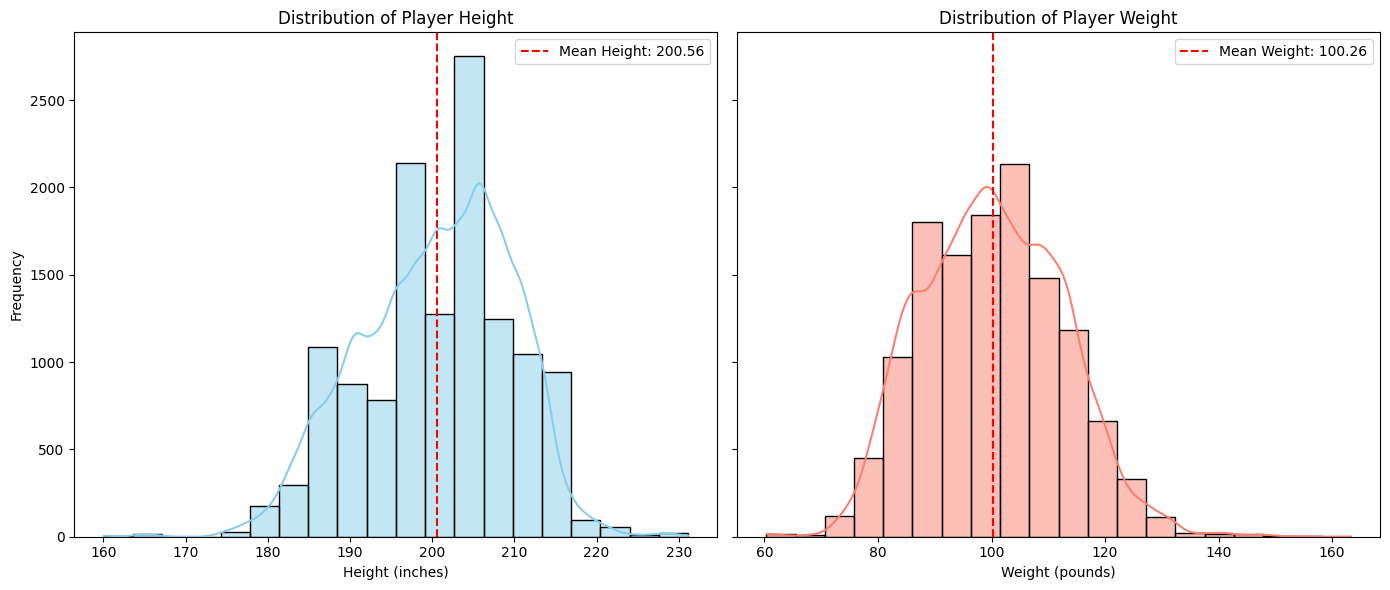

In [44]:
nba_data = nba_data[nba_data['playerHeight'].notnull() & nba_data['playerWeight'].notnull()]
mean_height = nba_data['playerHeight'].mean()
mean_weight = nba_data['playerWeight'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(nba_data['playerHeight'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean_height, color='red', linestyle='--', label=f'Mean Height: {mean_height:.2f}')
axes[0].set_title('Distribution of Player Height')
axes[0].set_xlabel('Height (inches)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(nba_data['playerWeight'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean_weight, color='red', linestyle='--', label=f'Mean Weight: {mean_weight:.2f}')
axes[1].set_title('Distribution of Player Weight')
axes[1].set_xlabel('Weight (pounds)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

**Question 9b:** What useful insight you get from this?

Answer: Both height and weight distributions appear relatively normal, though the height distribution is slightly right-skewed. The frequency of Height on the mean is ssignificantly lower than the frequency one category to the left and right.


**Question 10a:** Create a scatter plot with a regression line to visualize the relationship between player height and weight.

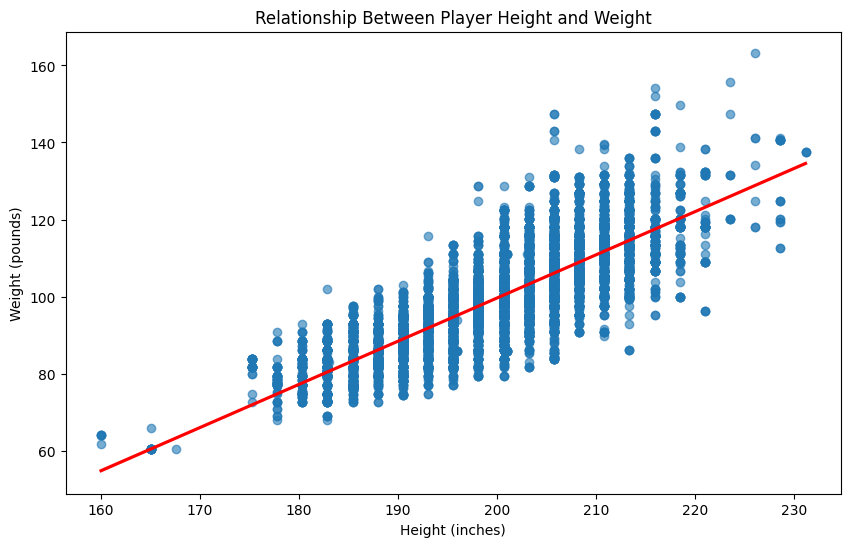

In [45]:
nba_data = nba_data[nba_data['playerHeight'].notnull() & nba_data['playerWeight'].notnull()]
plt.figure(figsize=(10, 6))
sns.regplot(x='playerHeight', y='playerWeight', data=nba_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Player Height and Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

**Question 10b:** Based on your analysis, describe the nature of the relationship between height and weight among NBA players.

Answer: The nature of the relationship between Height and Weight is that of a 'Positive Linear Relationship'.

**Question 11a:** Analyze the relationship between player age and the number of games played.

Create a line plot to visualize how the average number of games played (gp) varies with player age.

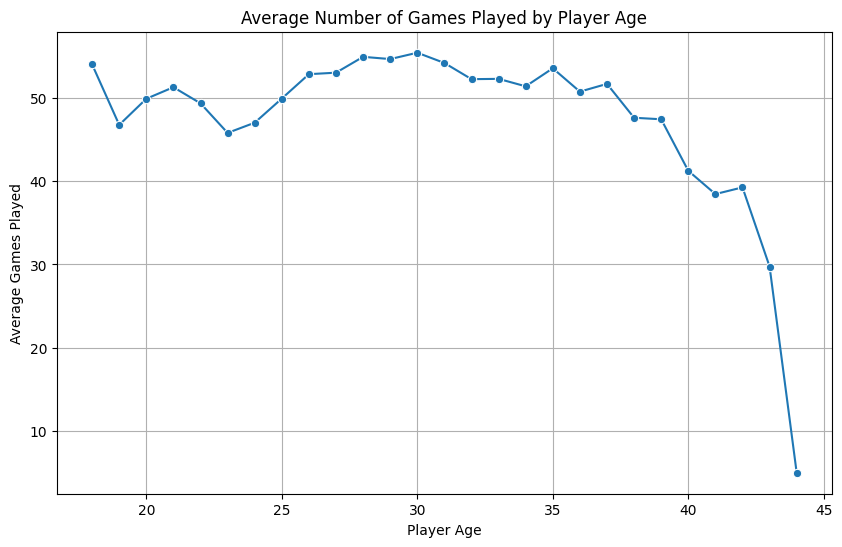

In [46]:
average_games_played = nba_data.groupby('age')['gamesPlayed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='gamesPlayed', data=average_games_played, marker='o')
plt.title('Average Number of Games Played by Player Age')
plt.xlabel('Player Age')
plt.ylabel('Average Games Played')
plt.grid()
plt.show()

**Question 11b:** Based on your analysis, describe the trend you observe regarding age and the number of games played by NBA players.

Answer: The trend between Player age and Avegrage Games Played clearly has a decreasing nature with increasing age.

**Question 12a:** Analyze the trends in player age and height over multiple seasons.

Create a dual-axis line plot that displays the average age of players and their average height for each season.

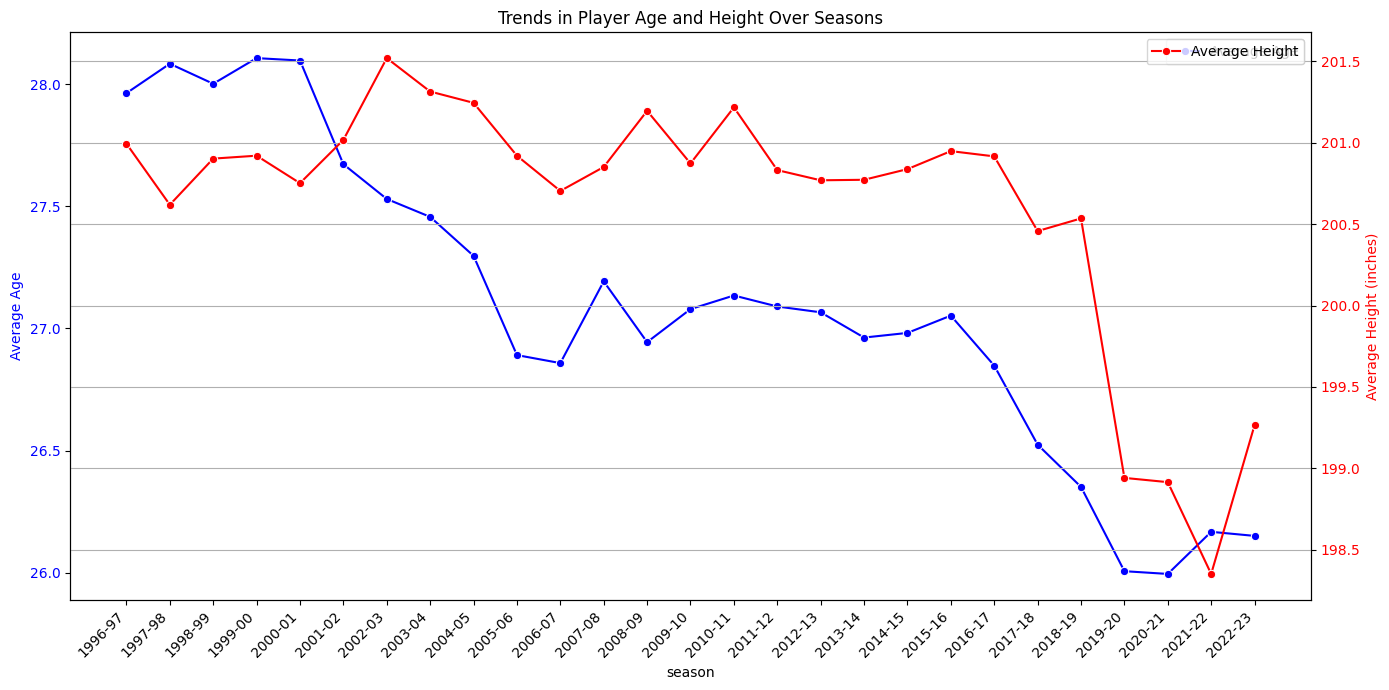

In [47]:
average_age_height = nba_data.groupby('season').agg({'age': 'mean', 'playerHeight': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(x='season', y='age', data=average_age_height, ax=ax1, color='b', marker='o', label='Average Age')
ax1.set_ylabel('Average Age', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(x='season', y='playerHeight', data=average_age_height, ax=ax2, color='r', marker='o', label='Average Height')
ax2.set_ylabel('Average Height (inches)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Trends in Player Age and Height Over Seasons')

plt.xticks(rotation=45, ha='right', fontsize=10)
ax1.set_xticks(range(len(average_age_height['season'])))
ax1.set_xticklabels(average_age_height['season'], rotation=45, ha='right', fontsize=10)

plt.grid()
plt.tight_layout()
plt.show()

**Question 12b:** How does player age change over the seasons?
Is there a noticeable trend in average player height over time?
What implications might these trends have for team composition and player recruitment strategies in the NBA?

Answer: The trend of height and age over the seasons are showing an overall decreasing trend. The reason for this change could be because the NBA could be giving height and age of the recruits less weight, focusing more on skill or any potential they're showing. 

**Question 13a:** Create a box plot to compare the distribution of assists made by players from three selected teams (e.g., Golden State Warriors, Los Angeles Lakers, and Miami Heat).

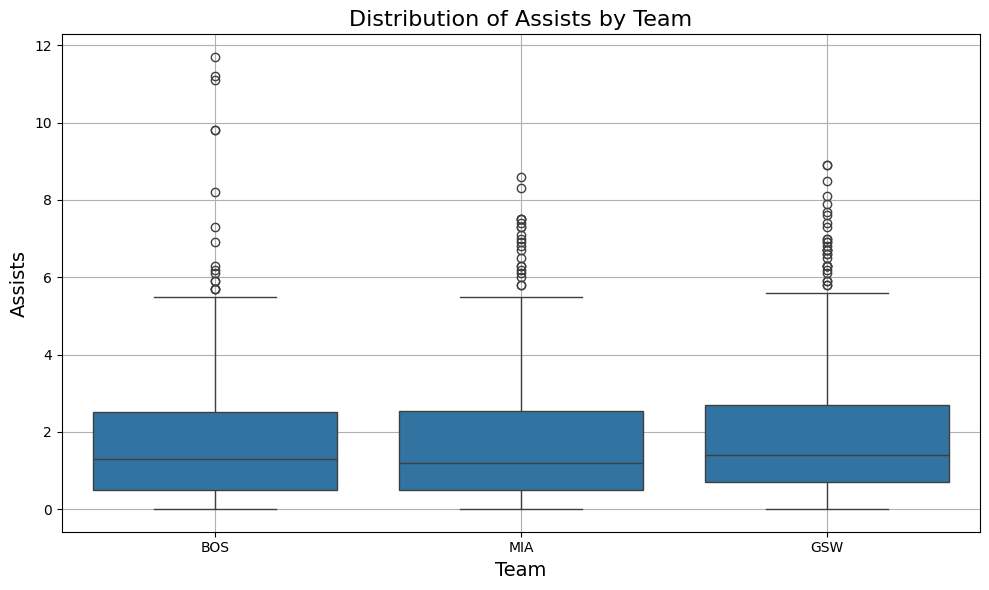

                  median   q1    q3  min   max      mean       std   iqr
teamAbbreviation                                                        
BOS                  1.3  0.5  2.50  0.0  11.7  1.835765  1.807346  2.00
GSW                  1.4  0.7  2.70  0.0   8.9  2.019953  1.863507  2.00
MIA                  1.2  0.5  2.55  0.0   8.6  1.788939  1.763889  2.05


In [49]:
teams_of_interest = ['GSW', 'BOS', 'MIA']
filtered_data = nba_data[(nba_data['teamAbbreviation'].isin(teams_of_interest))]
plt.figure(figsize=(10, 6))
sns.boxplot(x='teamAbbreviation', y='assists', data=filtered_data)
plt.title('Distribution of Assists by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Assists', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()
assist_stats = filtered_data.groupby('teamAbbreviation')['assists'].agg(
    median='median', 
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    min='min', 
    max='max', 
    mean='mean', 
    std='std'
)

assist_stats['iqr'] = assist_stats['q3'] - assist_stats['q1']
print(assist_stats)

**Question 13b:**
1. Which team has the highest median assists made by its players?
2. Are there any notable outliers in the distribution, and what might they indicate about individual player performances?
3. How do the distributions compare among the selected teams?


Answer:1. Golden State Warriors.
       2. BOS has the most noteable outliers in terms of assists. However MIA and GSW have consistently larger number of outliers with a lower score than those in BOS. Thus we can say that BOS has more varied players in terms of performance, while the performance of those in MIA and GSW have more consistent performances.
       3.All teams exhibit similar assist distributions, with similar IQR ranges and medians. However, GSW shows a slightly higher median and mean, suggesting that, on average, their players might contribute a bit more in terms of assists.